In [1]:
import pandas as pd

# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Apply the default theme and activate color codes
sns.set_theme()
sns.set(color_codes=True)

#Libraries necessaries for ChromaDB
import chromadb
from chromadb.config import Settings
from chromadb.utils import embedding_functions

What we want to show:
- Themes
- Publication year
- Journals 

In [ ]:
from chromadb.config import Settings
client = chromadb.Client(Settings(
    chroma_db_impl="duckdb+parquet",
    persist_directory="../chroma_with_Hamids_help/" # Optional, defaults to .chromadb/ in the current directory
))

In [ ]:
paper_sentences_col = client.get_collection("sentence_emb_1")
paper_sentences_col.get()

In [ ]:
results = paper_sentences_col.query(
    query_texts="impact of globalization",
    n_results=10
)
results["documents"][0]

In [2]:
metadata = pd.read_json('/Users/yasminesarraj/Documents/GitHub/Litsearch_backend/metadatas.json')
papers = pd.read_json('/Users/yasminesarraj/Documents/GitHub/Litsearch_backend/papers.json')

In [3]:
metadata

,title,authors,publication_year,journal_name,place
0,Adam: A Method for Stochastic Optimization,"[""Diederik P. Kingma"", ""Jimmy Ba""]",2015,arXiv (Cornell University),MISSING
1,Adam: A Method for Stochastic Optimization,"[""Diederik P. Kingma"", ""Jimmy Ba""]",2015,arXiv (Cornell University),MISSING
2,Adam: A Method for Stochastic Optimization,"[""Diederik P. Kingma"", ""Jimmy Ba""]",2015,arXiv (Cornell University),MISSING
3,Adam: A Method for Stochastic Optimization,"[""Diederik P. Kingma"", ""Jimmy Ba""]",2015,arXiv (Cornell University),MISSING
4,Adam: A Method for Stochastic Optimization,"[""Diederik P. Kingma"", ""Jimmy Ba""]",2015,arXiv (Cornell University),MISSING
...,...,...,...,...,...
17158,Vaccine hesitancy: the next challenge in the f...,"[""Amiel A. Dror"", ""Netanel Eisenbach"", ""Shahar...",2020,European Journal of Epidemiology,MISSING
17159,Vaccine hesitancy: the next challenge in the f...,"[""Amiel A. Dror"", ""Netanel Eisenbach"", ""Shahar...",2020,European Journal of Epidemiology,MISSING
17160,Vaccine hesitancy: the next challenge in the f...,"[""Amiel A. Dror"", ""Netanel Eisenbach"", ""Shahar...",2020,European Journal of Epidemiology,MISSING
17161,Vaccine hesitancy: the next challenge in the f...,"[""Amiel A. Dror"", ""Netanel Eisenbach"", ""Shahar...",2020,European Journal of Epidemiology,MISSING


In [5]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17163 entries, 0 to 17162
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             17163 non-null  object
 1   authors           17163 non-null  object
 2   publication_year  17163 non-null  int64 
 3   journal_name      17163 non-null  object
 4   place             17163 non-null  object
dtypes: int64(1), object(4)
memory usage: 670.6+ KB


In [6]:
papers

,title,url,year,journal,authors
0,Adam: A Method for Stochastic Optimization,http://arxiv.org/pdf/1412.6980,2015,arXiv (Cornell University),"[Diederik P. Kingma, Jimmy Ba]"
1,Global estimates of diabetes prevalence for 20...,http://www.diabetesresearchclinicalpractice.co...,2014,Diabetes Research and Clinical Practice,"[Leonor Guariguata, David Whiting, Ian Hamblet..."
2,Can Treatment Adherence Be Improved by Using R...,https://www.karger.com/Article/Pdf/480347,2017,Biomedicine hub,"[Jeremy Kirk, Anita MacDonald, Paul Lavender, ..."
3,Developmental potential in the first 5 years f...,http://www.thelancet.com/article/S014067360760...,2007,The Lancet,"[Sally Grantham-McGregor, Yin Bun Cheung, Sant..."
4,A nationwide survey of psychological distress ...,https://gpsych.bmj.com/content/gpsych/33/2/e10...,2020,General psychiatry,"[Jianyin Qiu, Bin Shen, Min Zhao, Zhen Wang, B..."
...,...,...,...,...,...
1140,Acceptability of App-Based Contact Tracing for...,https://jmir.org/api/download?alt_name=mhealth...,2020,Jmir mhealth and uhealth,"[Samuel Altmann, Luke Milsom, Hannah Zillessen..."
1141,"Dentists’ Awareness, Perception, and Attitude ...",https://publichealth.jmir.org/2020/2/e18798/PDF,2020,JMIR public health and surveillance,"[Yousef Khader, Mohannad Al Nsour, Ola B. Al-B..."
1142,A Sorting Platform Determines the Order of Pro...,https://www.science.org/cms/asset/94011997-6d4...,2011,Science,"[Maria Lara-Tejero, Jun-ya Kato, Samuel Wagner..."
1143,Safety in human-robot collaborative manufactur...,https://re.public.polimi.it/bitstream/11311/99...,2016,Virtual Community of Pathological Anatomy (Uni...,"[Andrea Maria Zanchettin, Nicola Maria Ceriani..."


In [7]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1145 non-null   object
 1   url      1145 non-null   object
 2   year     1145 non-null   int64 
 3   journal  1145 non-null   object
 4   authors  1145 non-null   object
dtypes: int64(1), object(4)
memory usage: 44.9+ KB


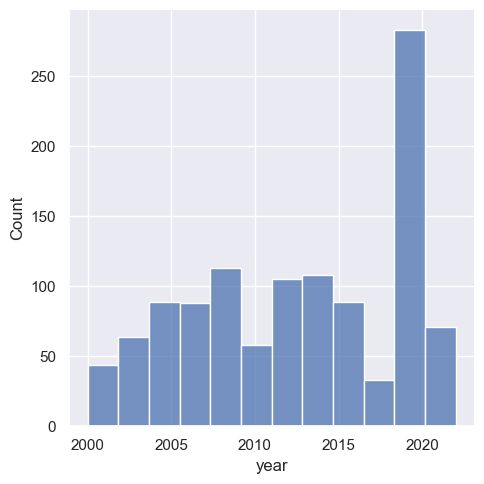

In [8]:
sns.displot(data=papers, 
            x="year")

In [9]:
journal = papers.groupby("journal")["title"].count().sort_values(ascending = False).head(10).to_frame().reset_index()
journal


,journal,title
0,Europe PMC (PubMed Central),64
1,RePEc: Research Papers in Economics,42
2,arXiv (Cornell University),41
3,PLOS ONE,40
4,International Journal of Environmental Researc...,20
5,Journal of Economic Perspectives,19
6,BMJ,17
7,"Library Union Catalog of Bavaria, Berlin and B...",17
8,British Journal of Psychiatry,17
9,JAMA,14


In [11]:
place = metadata.groupby("place")["title"].count().sort_values(ascending = False).head(10).to_frame().reset_index()
place


,place,title
0,MISSING,17163
